In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import okx.MarketData as MarketData
import csv
import json
from ultils import *
import datetime

In [12]:
flag = "0"  # Production trading:0 , demo trading:1
marketDataAPI =  MarketData.MarketAPI(flag=flag)

In [24]:
# From date and to date

before = "2018-01-01 00:00:00.0" # from
before = datetime_to_ms(before)

after = "2024-01-01 00:00:00.0" # to 
after = datetime_to_ms(after)

id = "BTC-USDT" # kind of coin
bar = '1d' # kind of bar




# Get current time
current_time = datetime.datetime.now()

In [25]:
# Retrieve history candlestick charts from recent years
def get_candlesticks(instId, start_ms, end_ms, bar):
    try:
        result = marketDataAPI.get_history_candlesticks(
            instId=instId,
            after=(start_ms),
            before=(end_ms),
            bar=bar,
        )
        return result
    except Exception as e:
        print(f"Error: {e}")
        return None


In [26]:
# Get history candlesticks
# Schedule to run the script every 10 times per second
result_all = []
while after - before >= 5940000:
    result = get_candlesticks(id, current_time, before, bar)
    result_all.append(result)
    after = after - 5940000 - 60000

result = get_candlesticks(id, current_time, before, bar)
result_all.append(result)

header:  {'Content-Type': 'application/json', 'x-simulated-trading': '0'}
domain: https://www.okx.com
url: /api/v5/market/history-candles?instId=BTC-USDT&after=2024-06-23 22:12:58.535989&before=1514739600000&bar=1d
header:  {'Content-Type': 'application/json', 'x-simulated-trading': '0'}
domain: https://www.okx.com
url: /api/v5/market/history-candles?instId=BTC-USDT&after=2024-06-23 22:12:58.535989&before=1514739600000&bar=1d
header:  {'Content-Type': 'application/json', 'x-simulated-trading': '0'}
domain: https://www.okx.com
url: /api/v5/market/history-candles?instId=BTC-USDT&after=2024-06-23 22:12:58.535989&before=1514739600000&bar=1d
header:  {'Content-Type': 'application/json', 'x-simulated-trading': '0'}
domain: https://www.okx.com
url: /api/v5/market/history-candles?instId=BTC-USDT&after=2024-06-23 22:12:58.535989&before=1514739600000&bar=1d
header:  {'Content-Type': 'application/json', 'x-simulated-trading': '0'}
domain: https://www.okx.com
url: /api/v5/market/history-candles?in

In [6]:
df = df[['o', 'h', 'l', 'c']]
# Tính Tenkan-sen (9 kỳ)
high_9 = df['h'].rolling(window=9).max()
low_9 = df['l'].rolling(window=9).min()
df['tenkan_sen'] = (high_9 + low_9) / 2

# Tính Kijun-sen (26 kỳ)
high_26 = df['h'].rolling(window=26).max()
low_26 = df['l'].rolling(window=26).min()
df['kijun_sen'] = (high_26 + low_26) / 2

# Tính Senkou Span A (dời 26 kỳ)
df['senkou_span_a'] = ((df['tenkan_sen'] + df['kijun_sen']) / 2).shift(26)

# Tính Senkou Span B (52 kỳ, dời 26 kỳ)
high_52 = df['h'].rolling(window=52).max()
low_52 = df['l'].rolling(window=52).min()
df['senkou_span_b'] = ((high_52 + low_52) / 2).shift(26)

# Tính Chikou Span (dời -26 kỳ)
df['chikou_span'] = df['c'].shift(-26)



C:\Users\7400\AppData\Local\Temp\ipykernel_43916\2649934071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tenkan_sen'] = (high_9 + low_9) / 2
C:\Users\7400\AppData\Local\Temp\ipykernel_43916\2649934071.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kijun_sen'] = (high_26 + low_26) / 2
C:\Users\7400\AppData\Local\Temp\ipykernel_43916\2649934071.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

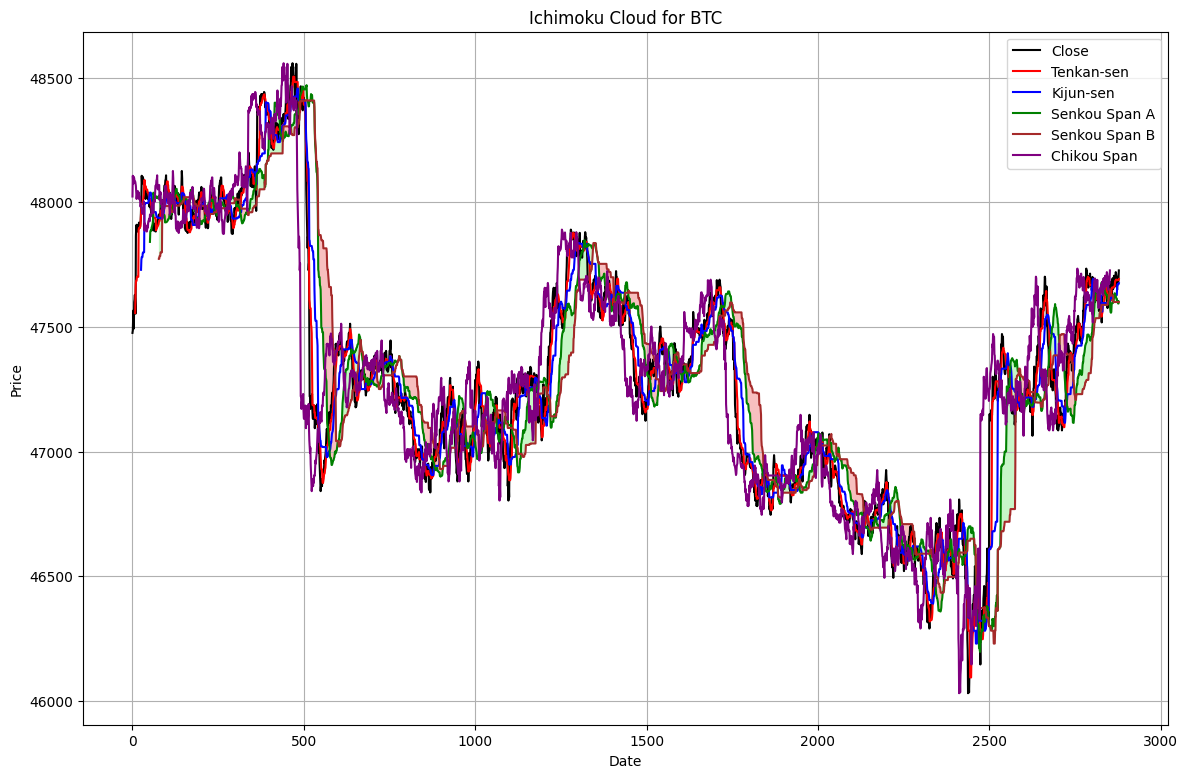

In [8]:
plt.figure(figsize=(14, 9))

plt.plot(df.index, df['c'], label='Close', color='black')
plt.plot(df.index, df['tenkan_sen'], label='Tenkan-sen', color='red')
plt.plot(df.index, df['kijun_sen'], label='Kijun-sen', color='blue')
plt.plot(df.index, df['senkou_span_a'], label='Senkou Span A', color='green')
plt.plot(df.index, df['senkou_span_b'], label='Senkou Span B', color='brown')
plt.plot(df.index, df['chikou_span'], label='Chikou Span', color='purple')

# Tô màu mây Kumo
plt.fill_between(df.index, df['senkou_span_a'], df['senkou_span_b'],
                 where=df['senkou_span_a'] >= df['senkou_span_b'], facecolor='lightgreen', alpha=0.5)
plt.fill_between(df.index, df['senkou_span_a'], df['senkou_span_b'],
                 where=df['senkou_span_a'] < df['senkou_span_b'], facecolor='lightcoral', alpha=0.5)

plt.title(f'Ichimoku Cloud for BTC')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()
